In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2024-10-07,5737.799805,5739.339844,5686.850098,5695.939941,3637790000,0,0
2024-10-08,5719.140137,5757.600098,5714.560059,5751.129883,3393400000,0,0
2024-10-09,5751.799805,5796.799805,5745.020020,5792.040039,3650340000,0,0


In [5]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2024-09-30', '2024-10-01', '2024-10-02', '2024-10-03',
               '2024-10-04', '2024-10-07', '2024-10-08', '2024-10-09',
               '2024-10-10', '2024-10-11'],
              dtype='datetime64[ns]', name='Date', length=18816, freq=None)

<AxesSubplot:xlabel='Date'>

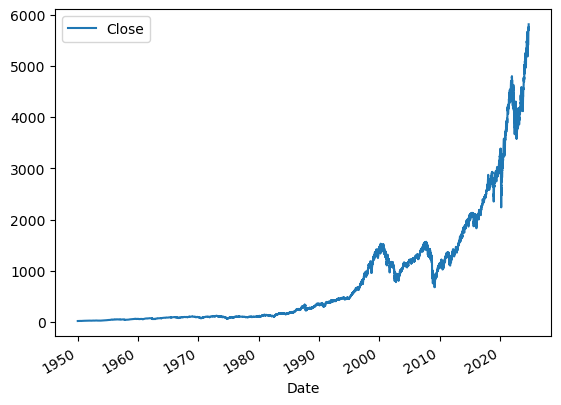

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2024-10-07,5737.799805,5739.339844,5686.850098,5695.939941,3637790000,5751.129883
2024-10-08,5719.140137,5757.600098,5714.560059,5751.129883,3393400000,5792.040039
2024-10-09,5751.799805,5796.799805,5745.020020,5792.040039,3650340000,5780.049805


In [10]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2024-10-07,5737.799805,5739.339844,5686.850098,5695.939941,3637790000,5751.129883,1
2024-10-08,5719.140137,5757.600098,5714.560059,5751.129883,3393400000,5792.040039,1
2024-10-09,5751.799805,5796.799805,5745.020020,5792.040039,3650340000,5780.049805,0


In [12]:
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-10-07,5737.799805,5739.339844,5686.850098,5695.939941,3637790000,5751.129883,1
2024-10-08,5719.140137,5757.600098,5714.560059,5751.129883,3393400000,5792.040039,1
2024-10-09,5751.799805,5796.799805,5745.020020,5792.040039,3650340000,5780.049805,0


In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High","Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
import pandas as pd 

preds = pd.Series(preds, index=test.index)

In [17]:
precision_score(test["Target"], preds)

0.631578947368421